In [37]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Get data
data = pd.read_csv('data/LASSO-data-set.csv')

# Seperate independent and dependent variables
X = data.copy().drop(columns='score')
y = data.copy()['score']

# Split training and testing set on 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [38]:
# Use LassoCV to fit regression
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
print(f'Get R-squared: {reg.score(X_test, y_test)}')
print(f'Alpha: {reg.alpha_}')
alpha = reg.alpha_

Get R-squared: 0.9999091681500318
Alpha: 1.0749236577654113


Coefficient of determination:  0.999909118352878
Median absolute error:         0.6512845529577476


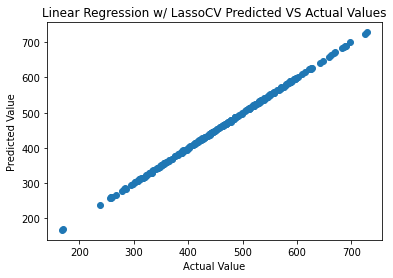

In [39]:
# Generate the preductions on test set
predictions = reg.predict(X_test)

# Scatter 1: predicted versus actual values
fig1, ax1 = plt.subplots()
ax1.scatter(y_test, predictions)
ax1.set_xlabel('Actual Value')
ax1.set_ylabel('Predicted Value')
ax1.set_title('Linear Regression w/ LassoCV Predicted VS Actual Values')
print(f'Coefficient of determination:  {r2_score(list(predictions), list(y_test))}')
print(f'Median absolute error:         {median_absolute_error(list(predictions), list(y_test))}')
# Median absolute error is median value of all absolute differences between prediction and actual

Text(0.5, 1.0, 'Linear Regression w/ LassoCV Predicted VS Residuals')

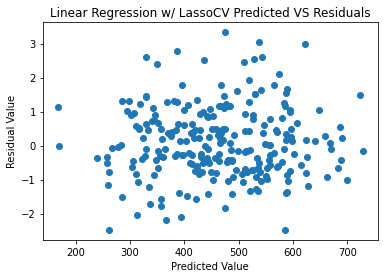

In [40]:
# Scatter 2: predicted versus residuals
residuals = y_test - reg.predict(X_test)
fig2, ax2 = plt.subplots()
ax2.scatter(predictions, residuals)
ax2.set_xlabel('Predicted Value')
ax2.set_ylabel('Residual Value')
ax2.set_title('Linear Regression w/ LassoCV Predicted VS Residuals')

In [41]:
# Get linear regression equation
print('y=')
i = 0
for coeff in reg.coef_:
    if ('-' in str(coeff)):
        print(f'  {coeff} * {X.columns[i]}')
    else:
        print(f'  +{coeff} * {X.columns[i]}')
    i += 1
if ('-' in str(reg.intercept_)):
    print(f'  {reg.intercept_}')
else:
    print(f'  +{reg.intercept_}') 
# Retained: dexterity, charisma, weight, height, modifier3, modifier4, modifier6, modifier8
# Dropped: strength, constitution, wisdom, intelligence, modifier1, modfier2, modifier5, modifier7
print(f'Retained: 8')
print(f'Dropped: 8')

y=
  +0.0 * strength
  -0.0006721759765477429 * dexterity
  -0.0 * constitution
  +0.0 * wisdom
  +0.0 * intelligence
  -0.005375135067366314 * charisma
  +3.9795950474309674 * weight
  -4.9927220643933765 * height
  +0.0 * modifier1
  +0.0 * modifier2
  +0.019874646969768983 * modifier3
  +5.977641964349887 * modifier4
  -0.0 * modifier5
  -0.006061428168212965 * modifier6
  -0.0 * modifier7
  -6.868311570279581 * modifier8
  -66.22924695707832
Retained: 8
Dropped: 8


In [42]:
# Use LinearRegression to fit regression
reg2 = LinearRegression().fit(X_train, y_train)
print(f'Get R-squared: {reg2.score(X_test, y_test)}')

Get R-squared: 0.999916814568704


Coefficient of determination:  0.9999170828192588
Median absolute error:         0.6903263322637372


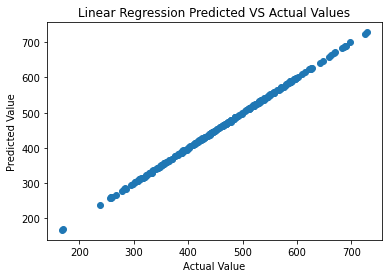

In [43]:
# Generate the preductions on test set
predictions2 = reg2.predict(X_test)

# Scatter 3: predicted versus actual values
fig3, ax3 = plt.subplots()
ax3.scatter(y_test, predictions)
ax3.set_xlabel('Actual Value')
ax3.set_ylabel('Predicted Value')
ax3.set_title('Linear Regression Predicted VS Actual Values')
print(f'Coefficient of determination:  {r2_score(list(predictions2), list(y_test))}')
print(f'Median absolute error:         {median_absolute_error(list(predictions2), list(y_test))}')
# Median absolute error is median value of all absolute differences between prediction and actual

Text(0.5, 1.0, 'Linear Regression w/ LassoCV Predicted VS Residuals')

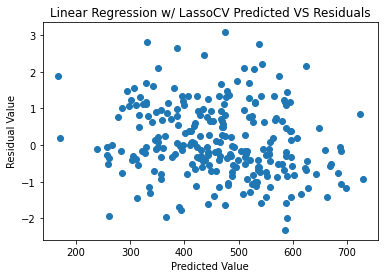

In [45]:
# Scatter 4: predicted versus residuals
residuals2 = y_test - reg2.predict(X_test)
fig4, ax4 = plt.subplots()
ax4.scatter(predictions2, residuals2)
ax4.set_xlabel('Predicted Value')
ax4.set_ylabel('Residual Value')
ax4.set_title('Linear Regression w/ LassoCV Predicted VS Residuals')

In [44]:
# Get linear regression equation
print('y=')
i = 0
for coeff in reg2.coef_:
    if ('-' in str(coeff)):
        print(f'  {coeff} * {X.columns[i]}')
    else:
        print(f'  +{coeff} * {X.columns[i]}')
    i += 1
if ('-' in str(reg2.intercept_)):
    print(f'  {reg2.intercept_}')
else:
    print(f'  +{reg2.intercept_}') 
# Retained: all
# Dropped: none
print(f'Retained: 16')
print(f'Dropped: 0')

y=
  -0.004633604660784997 * strength
  -0.0012989146247290861 * dexterity
  +0.006306866325346239 * constitution
  7.444041052143135e-05 * wisdom
  +0.000166508659563247 * intelligence
  +0.0001718315649178806 * charisma
  +4.007954023146731 * weight
  -5.011237571447849 * height
  -0.012349690809665727 * modifier1
  -0.0019706370923101013 * modifier2
  +0.009617755441166803 * modifier3
  +6.008969185355365 * modifier4
  +0.009343548558157486 * modifier5
  -0.006322941009432771 * modifier6
  +0.023804086580545877 * modifier7
  -7.007711475211763 * modifier8
  -69.42199849114922
Retained: 16
Dropped: 0


The main difference between the two methods is that the LassoCV removes values that it believes to not contribute significantly to the linear regression prediction. This does result in a slightly lower median absolute error and prediction method that is easier to explain.